In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,577 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [1]:
# 한글 글꼴 path
import os
os.listdir("/usr/share/fonts/truetype/nanum/")

['NanumSquareB.ttf',
 'NanumSquareRoundB.ttf',
 'NanumMyeongjo.ttf',
 'NanumSquareRoundR.ttf',
 'NanumBarunGothic.ttf',
 'NanumGothicBold.ttf',
 'NanumSquareR.ttf',
 'NanumMyeongjoBold.ttf',
 'NanumBarunGothicBold.ttf',
 'NanumGothic.ttf']

In [2]:
#워드클라우드 설치
! pip install wordcloud

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd

from tqdm import tqdm_notebook
import re

In [16]:
data_file = '/content/drive/MyDrive/네이버뉴스_지하철_2021-07-15_05시21분.xlsx'
df = pd.read_excel(data_file)
df.head()

,Unnamed: 0,title,url
0,0,"“데려다 줄게요” 부산 지하철 직원, 만취여성 따라가 성폭행",https://www.chosun.com/national/incident/2021/...
1,1,"""서울지하철, 노인연령 70대로 상향 시 최대 34% 손실 감소""",http://www.newsis.com/view/?id=NISX20210714_00...
2,2,교통공사 직원이 지하철서 취한 여성 데려가 성폭행,http://news.kmib.co.kr/article/view.asp?arcid=...
3,3,"안정환 ""알바로 지하철 5호선 공사 허드렛일""…김동현 ""난 하수도 뚫는 작업""",https://www.news1.kr/articles/?4372086
4,4,지하철역서 만취여성 도와준다며… 집 따라가 성폭행한 교통공사 직원,https://www.donga.com/news/article/all/2021071...


In [17]:
df['title'][0]

'“데려다 줄게요” 부산 지하철 직원, 만취여성 따라가 성폭행'

In [19]:
# 한글을 제회한 문자들을 제거한 컬럼을 만든다
import re
def leave_all_hangul(ssibal):
    return re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", ssibal)

df['title_clean'] = df['title'].apply(leave_all_hangul)
df.head()

,Unnamed: 0,title,url,title_clean
0,0,"“데려다 줄게요” 부산 지하철 직원, 만취여성 따라가 성폭행",https://www.chosun.com/national/incident/2021/...,데려다 줄게요 부산 지하철 직원 만취여성 따라가 성폭행
1,1,"""서울지하철, 노인연령 70대로 상향 시 최대 34% 손실 감소""",http://www.newsis.com/view/?id=NISX20210714_00...,서울지하철 노인연령 대로 상향 시 최대 손실 감소
2,2,교통공사 직원이 지하철서 취한 여성 데려가 성폭행,http://news.kmib.co.kr/article/view.asp?arcid=...,교통공사 직원이 지하철서 취한 여성 데려가 성폭행
3,3,"안정환 ""알바로 지하철 5호선 공사 허드렛일""…김동현 ""난 하수도 뚫는 작업""",https://www.news1.kr/articles/?4372086,안정환 알바로 지하철 호선 공사 허드렛일김동현 난 하수도 뚫는 작업
4,4,지하철역서 만취여성 도와준다며… 집 따라가 성폭행한 교통공사 직원,https://www.donga.com/news/article/all/2021071...,지하철역서 만취여성 도와준다며 집 따라가 성폭행한 교통공사 직원


In [20]:
# 한글만 쓰여진 컬럼의 빈도수를 구하는 함수 제작, 데이타프레임으로 저장함 
# 저장하는 중 단어 길이가 1인 단어 제거(명 같은 단위를 없애기 위해)
freq = dict()
for _, word_count in df["title_clean"].iteritems():
    word_split = word_count.split()
    for word in word_split:
        if word not in freq:
            freq[word] = 1
        else:
            freq[word] += 1

freq_df = pd.DataFrame(list(freq.items()), columns=["word", "count"])
freq_df = freq_df.loc[freq_df["word"].apply(lambda x: len(x)!=1), :]
freq_df = freq_df.set_index("word")
freq_df.head()

,count
word,
데려다,1
줄게요,2
부산,44
지하철,1526
직원,9


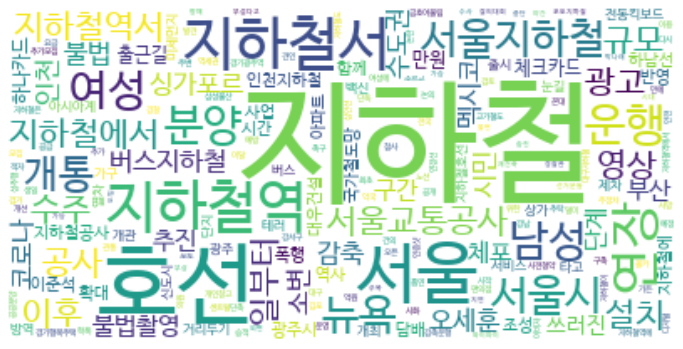

In [21]:
# wordcloud_image = WordCloud().generate(df['title'].values)
# 워드 클라우드 제작
plt.figure(figsize=(12,8))
wc = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", 
    background_color='white'
)
# title = df['title']
wordcloud_image = wc.generate_from_frequencies(freq_df["count"])

plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')

plt.savefig('/content/data/지하철_네이버뉴스기사_워드클라우드.png', dpi = 100)

plt.show()